In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime

from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


from googletrans import Translator

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('daily8_5.csv')
data['dateline'] = pd.to_datetime(data.dateline)
df = data.copy()
df = df[df.text_label != 'False']
df2 = df

In [3]:
df['dateline'] = df['dateline'].astype(str)
df = df[df.dateline != '1998-04-02']
df['dateline'] = pd.to_datetime(df['dateline'])
df['dateline']
df["quarter"] = pd.PeriodIndex(df.dateline, freq='Q')
quarter_perc = pd.crosstab(df.quarter, df.text_label, margins=True)
quarter_perc

text_label,negative,neutral,positive,All
quarter,,,,
2001Q1,8,3,2,13
2001Q2,67,9,1,77
2001Q3,3,0,0,3
2001Q4,176,12,6,194
2002Q1,165,16,9,190
2002Q2,207,17,5,229
2002Q3,351,532,61,944
2002Q4,275,619,54,948
2003Q1,607,1000,107,1714


In [4]:
quarter_perc = quarter_perc.apply(lambda x: x / x['All'] * 100, axis=1)
quarter_perc = quarter_perc.drop(columns=['All'])

In [5]:
quarter_perc

text_label,negative,neutral,positive
quarter,,,
2001Q1,61.538462,23.076923,15.384615
2001Q2,87.012987,11.688312,1.298701
2001Q3,100.000000,0.000000,0.000000
2001Q4,90.721649,6.185567,3.092784
2002Q1,86.842105,8.421053,4.736842
2002Q2,90.393013,7.423581,2.183406
2002Q3,37.182203,56.355932,6.461864
2002Q4,29.008439,65.295359,5.696203
2003Q1,35.414236,58.343057,6.242707


<AxesSubplot:xlabel='quarter'>

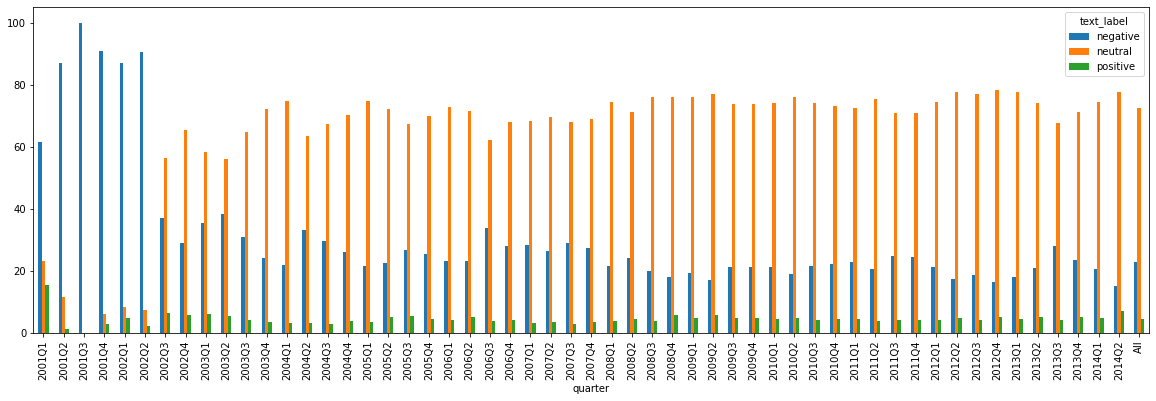

In [6]:
plt.rcParams['figure.figsize'] = (20,6)
quarter_perc.plot(kind = 'bar')

In [7]:
transcription_table=pd.DataFrame(
    {
        'source': ['Alittihad','Echoroukonline','Ryiadh','SaudiYoum','Techreen', 'Alqabas', 'Almustaqbal','Almasryalyoum', 'Youm7','Sabanews'],
        'country': ['UAE','Algeria','Saudi_Arabia','Saudi_Arabia','Syria', 'Kuwait', 'Lebanon','Egypt','Egypt','Yemen']
    }
)

mapping = transcription_table.set_index('source').to_dict()['country']

df['country'] = df['source'].apply(lambda x: mapping.get(x))
#map country to news source

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237705 entries, 1 to 331869
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           237705 non-null  int64         
 1   id              237705 non-null  object        
 2   url             237705 non-null  object        
 3   headline        237705 non-null  object        
 4   dateline        237705 non-null  datetime64[ns]
 5   text            237705 non-null  object        
 6   tags            237705 non-null  object        
 7   source          237705 non-null  object        
 8   text_label      237705 non-null  object        
 9   text_score      237705 non-null  object        
 10  headline_label  237705 non-null  object        
 11  headline_score  237705 non-null  float64       
 12  quarter         237705 non-null  period[Q-DEC] 
 13  country         237705 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [9]:
df['country']

1             UAE
3             UAE
4             UAE
5             UAE
6             UAE
           ...   
331864    Lebanon
331865    Lebanon
331866    Lebanon
331867    Lebanon
331869    Lebanon
Name: country, Length: 237705, dtype: object

In [10]:
cluster1 = df[['source', 'quarter', 'country']]# Make object
cluster1['quarter'] = cluster1['quarter'].astype(str)
df = pd.get_dummies(cluster1)

In [11]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
df['k_cluster'] = kmeans.predict(df)

In [12]:
cluster1_perc = pd.crosstab(df.)

SyntaxError: invalid syntax (2581871252.py, line 1)